# Lab 10 (26-03-2024)

### Execute AdaBoost, Stacked Generalization, and Voting Regressor on a dataset suitable for classification or regression. Analyze the outcomes, considering factors such as accuracy and computational efficiency.




In [42]:
Registration_Number = "22011103048"
Name = "Roahith R"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Roahith R and my roll no : 22011103048
Computer IP Address is: 10.17.160.190


### Dataset : Wine Dataset 

##### **About Dataset:**


| Column Name                   | Role   | Type        | Description                        | Units   |
|-------------------------------|--------|-------------|------------------------------------|---------|
| alcohol                       | Feature| Continuous  | Alcohol content                    | % vol   |
| malic_acid                    | Feature| Continuous  | Malic acid content                 | g/dm^3  |
| ash                           | Feature| Continuous  | Ash content                        | g/dm^3  |
| alcalinity_of_ash             | Feature| Continuous  | Alcalinity of ash                  | mEq/100 g |
| magnesium                     | Feature| Continuous  | Magnesium content                  | mg/dm^3 |
| total_phenols                 | Feature| Continuous  | Total phenolic content             | mg/L    |
| flavanoids                    | Feature| Continuous  | Flavanoid content                  | mg/L    |
| nonflavanoid_phenols          | Feature| Continuous  | Non-flavanoid phenolic content    | mg/L    |
| proanthocyanins               | Feature| Continuous  | Proanthocyanin content             | mg/L    |
| color_intensity               | Feature| Continuous  | Color intensity of the wine        | -       |
| hue                           | Feature| Continuous  | Hue of the wine                    | -       |
| od280/od315_of_diluted_wines  | Feature| Continuous  | OD280/OD315 of diluted wines      | -       |
| proline                       | Feature| Continuous  | Proline content                    | mg/L    |
| Targets                       | Target | Categorical | Class of wine cultivar             | -       |

**Size : 178 x 14**

Number of Target Classes: 3 [59, 71, 48] 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine



In [44]:
data = load_wine()
df = pd.DataFrame(data=data['data'], columns=data.feature_names)
df['Target'] = data.target
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols   
0    14.23        1.71  2.43               15.6      127.0           2.80  \
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue   
0        3.06                  0.28             2.29             5.64  1.04  \
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [46]:
# Check for missing values
df.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

<Axes: >

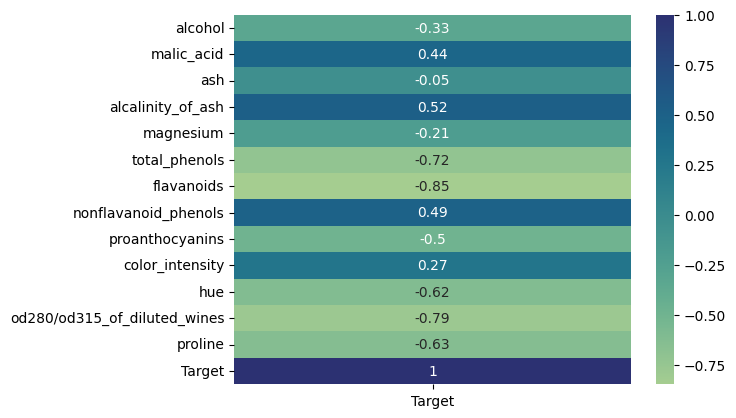

In [47]:
corr_matrix_Target = df.corr()['Target']
sns.heatmap(corr_matrix_Target.to_frame(), annot=True, cmap='crest')


<div style='page-break-after:always;'></div>

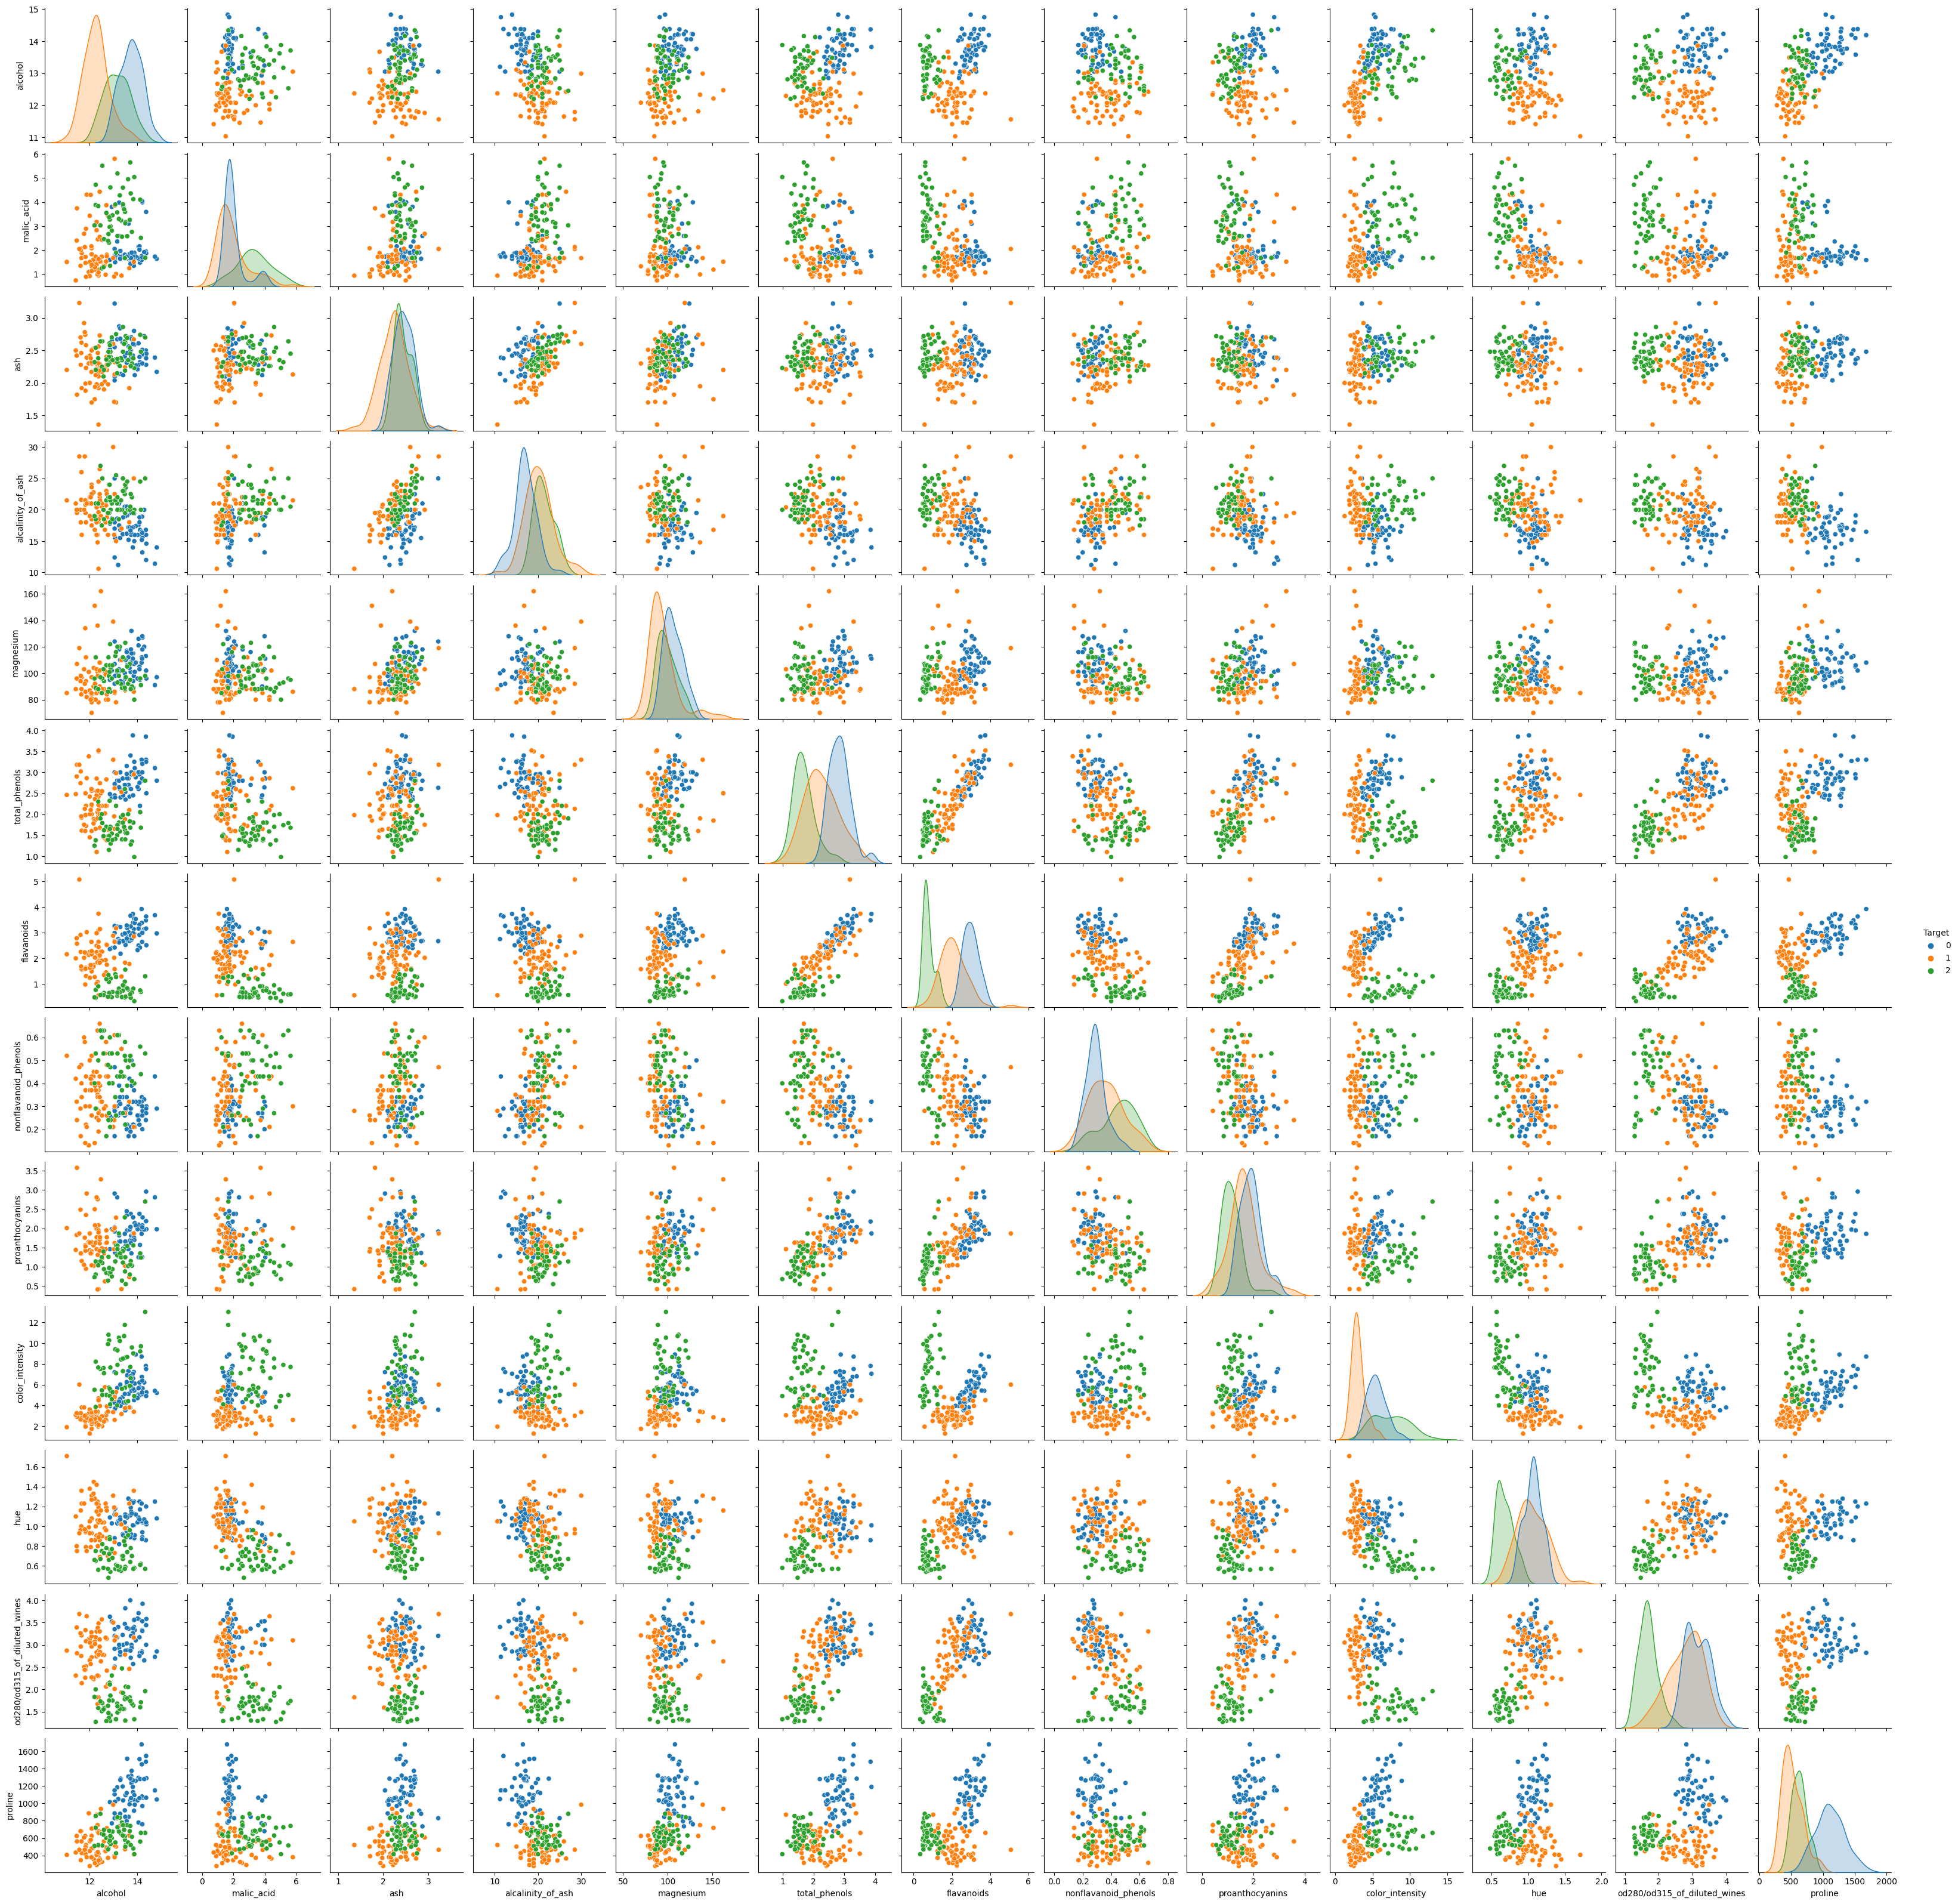

In [48]:
sns.pairplot(df, hue='Target',palette="tab10")

plt.show()

For wine dataset and ensemble classification (Random Forest, Gradient Boosting), PCA and standardization are usually not required due to the robustness of these models to feature scale.

In [49]:
# Split into Feature and Target
x = df.drop(['Target'],axis=1)
y = df['Target']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=143)


<div style='page-break-after:always;'></div>

### Train and Evaluate Models

In [51]:
# Import Dependencies
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, make_scorer,mean_squared_error



In [52]:
def evaluate_model(model, X, y):
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(accuracy_score))
    print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))
    
    # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("Cross_Validation Score")
    plt.legend(loc="best")
    plt.grid()
    plt.title("Learning Curve")
    plt.show()




<div style='page-break-after:always;'></div>

##### (1) *AdaBoost: Boosting Weak Learners*

- Iterative Integration: AdaBoost sequentially incorporates weak learners into a robust model by adjusting sample weights based on their performance.
- Model Diversity: Weak learners, typically simple decision trees, are trained on weighted subsets of the data, focusing on misclassified samples from previous models.
- Aggregated Predictions: AdaBoost combines predictions from multiple weak learners through weighted majority voting to construct a formidable ensemble model.



AdaBoost Classifier:


c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py

Cross-Validation Accuracy: 0.87 (+/- 0.11)


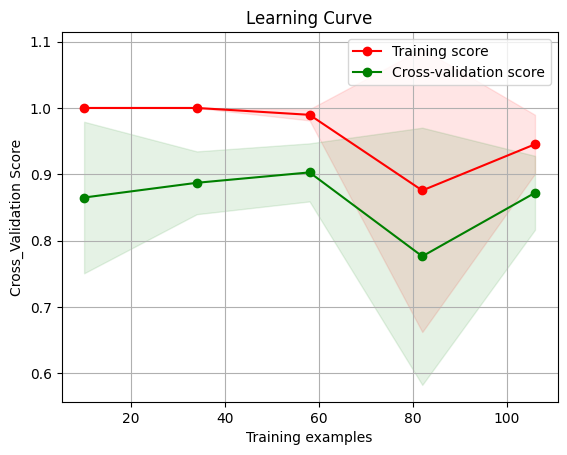

In [53]:
# AdaBoost
base_clf = DecisionTreeClassifier(max_depth=1)
ada_boost_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=100, random_state=101)
print("AdaBoost Classifier:")
evaluate_model(ada_boost_clf, X_train, y_train)


##### **Insights from AdaBoost Classifier on the Wine Dataset**

- Achieves a relatively high cross-validation accuracy of 0.87 (+/- 0.11), indicating good performance on average.
- Effective in leveraging weak learners as base estimators, demonstrating robustness in handling diverse data.
- Potential risk of overfitting if the base estimators are too complex for the dataset.
- Shows a slightly lower accuracy compared to other ensemble models, suggesting room for improvement in predictive power.




<div style='page-break-after:always;'></div>

##### (2) *Stacked Generalization: Meta-Model Fusion*

- Heterogeneous Base Models: Stacking involves training diverse base models on the dataset, leveraging their complementary strengths.
- Meta-Model Integration: A meta-model, often a linear regression or logistic regression model, blends predictions from the base models to improve accuracy.
- Overfitting Mitigation: Stacking mitigates the risk of overfitting by introducing model diversity and combining predictions in a balanced manner.


Stacked Generalization Classifier:


c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Roahith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Cross-Validation Accuracy: 0.96 (+/- 0.07)


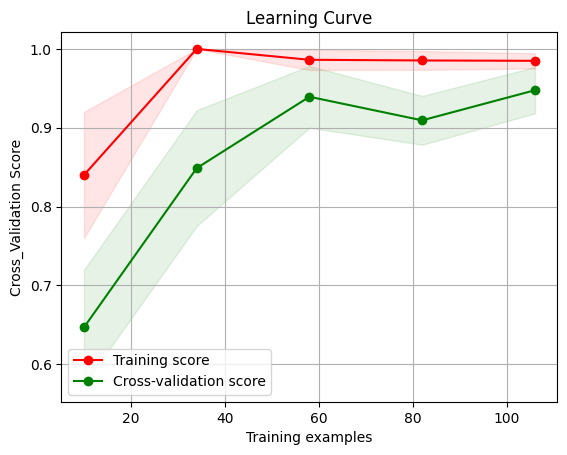

In [54]:
# Stacked Generalization
estimators = [('dt', DecisionTreeClassifier()), ('lr', LogisticRegression())]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
print("Stacked Generalization Classifier:")
evaluate_model(stacking_clf, X_train, y_train)



### Insights from Stacked Generalization Classifier on the Wine Dataset

- Demonstrates a high cross-validation accuracy of 0.96 (+/- 0.07), signifying exceptional performance in generalization.
- Utilizes an ensemble of diverse models, allowing for capturing various aspects of the data distribution effectively.
- Convergence issues observed in the logistic regression component, indicating potential challenges in optimizing certain model components.
- May incur higher computational costs due to the need for training multiple models and meta-learners.



<div style='page-break-after:always;'></div>

##### (3) *Voting Regressor: Aggregating Predictions*

- Averaging Predictions: Voting Regressor aggregates predictions from multiple base regressors through averaging or weighted averaging.
- Bias-Variance Tradeoff: Leveraging the diversity among base regressors, Voting Regressor enhances model robustness and generalization ability.
- Ensemble Performance: Voting Regressor's performance is assessed in regression tasks, comparing its efficacy with AdaBoost and Stacked Generalization.

Cross-Validation MSE: 0.06002769932975447
Test MSE: 0.027762893607987414


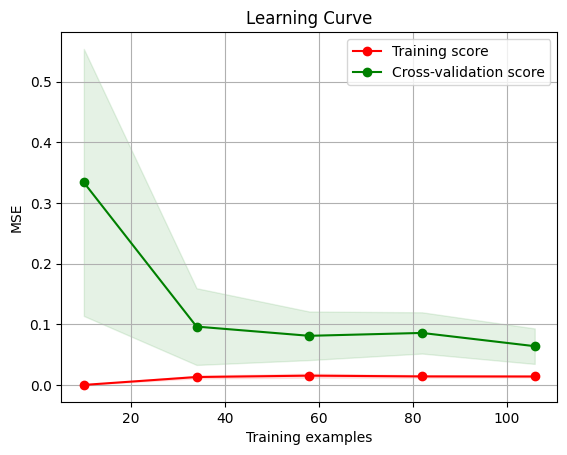

In [58]:
def train_voting_regressor(X_train, y_train):
    
    dt_regressor = DecisionTreeRegressor()
    lr_regressor = LinearRegression()

    voting_reg = VotingRegressor([('dt', dt_regressor), ('lr', lr_regressor)])
    voting_reg.fit(X_train, y_train)
    
    return voting_reg

def evaluate_model(model, X_train, y_train, cv=5):
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mse_mean = -cv_scores.mean()
    return mse_mean

def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

def plot_learning_curve(model, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    train_mean = np.mean(-train_scores, axis=1)
    train_std = np.std(-train_scores, axis=1)
    test_mean = np.mean(-test_scores, axis=1)
    test_std = np.std(-test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.legend(loc="best")
    plt.grid()
    plt.title("Learning Curve")
    plt.show()


# Train Voting Regressor
voting_reg = train_voting_regressor(X_train, y_train)

# Evaluate model using cross-validation
mse_cv = evaluate_model(voting_reg, X_train, y_train)
print("Cross-Validation MSE:", mse_cv)

# Test model
mse_test = test_model(voting_reg, X_test, y_test)
print("Test MSE:", mse_test)

# Plot Learning Curve
plot_learning_curve(voting_reg, X_train, y_train)

### Insights from Voting Regressor on the Wine Dataset

- Achieves a low cross-validation mean squared error (MSE) of 0.060, showcasing strong predictive performance in terms of regression.
- Integrates predictions from multiple regression models, leading to enhanced accuracy and robustness in predictions.
- Lack of available accuracy metric makes it challenging to directly compare its performance with other classifiers (It predicts continuous numerical values rather than discrete classes).
- May not effectively capture complex relationships in the data, potentially limiting its predictive capabilities compared to more sophisticated models.